In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import norm
import statsmodels.api as sm

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [111]:
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

In [112]:
from sklearn.metrics import (confusion_matrix, 
                             accuracy_score, 
                             precision_recall_curve)

In [113]:
df = pd.read_csv('ad_10000records.csv')

In [114]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [115]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Daily Time Spent on    │   0 │     0 │   61.66 │   15.7 │   32.6 │  48.86 │ 59.59 │ 76.58 │ 90.97 │ ▆▅▇▅▆▅ │  │
│ │ Site                   │     │       │         │        │        │        │       │       │       │        │  │
│ │ Age                    │   0 │     0 │   35.94 │  8.573 │     19 │     29 │    35 │    42 │    60 │ ▃▇▇▅▃▁ │  │
│ │ Area Income            │   0 │     0 │   53840 │  13340 │  14000 │  44050 │ 56180 │ 61840 │ 79330 │ ▁▃▃▇▇▃ │  │
│ │ Daily Internet Usage   │   0 │     0 │   177.8 │  40.82 │  105.2 │  140.2 │ 178.9 │ 212.7 │   270 │ ▇▆▇▇▇▁ │  │
│ │ Clicked on Ad          │   0 │     0 │  0.4917 │    0.5 │      0 │      0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Ad Topic Line                │      0 │          0 │                         3.2 │                   31734 │  │
│ │ City                         │      0 │          0 │                         1.5 │                   14593 │  │
│ │ Gender                       │      0 │          0 │                           1 │                   10000 │  │
│ │ Country                      │      0 │          0 │                         1.4 │                   13841 │  │
│ │ Timestamp                    │      0 │          0 │                           2 │                   20000 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [116]:
print(df.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


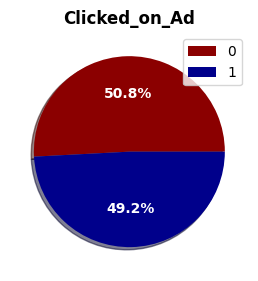

In [117]:
from collections import Counter
plt.figure(figsize = (4, 3.1))
plt.pie(x = list(Counter(df['Clicked on Ad']).values()), 
        labels = list(Counter(df['Clicked on Ad']).keys()), 
        colors = ["darkred", "darkblue"], 
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'})
plt.legend(loc = 'upper right')
plt.title("Clicked_on_Ad", fontsize = 12, fontweight = "bold", color = "black")
plt.show()

In [118]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [119]:
label_encoders = {}
categorical_columns = ['Gender', 'Country', 'Ad Topic Line', 'City']

In [120]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [121]:
df.drop(columns=['Timestamp'], inplace=True)

In [122]:
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [124]:
scaler = StandardScaler()
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'Month']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [125]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,96,234,1,174,0,21,9,6
1,41.73,31.0,61840.26,207.17,301,460,1,166,0,17,16,1
2,44.40,30.0,57877.15,172.83,484,379,0,71,0,10,29,6
3,59.88,28.0,56180.93,207.17,24,269,0,205,0,14,21,6
4,49.21,30.0,54324.73,201.58,484,495,0,149,1,10,21,7


In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,r2_score

In [127]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

In [128]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [129]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [130]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [131]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [132]:
best_params = grid_search.best_params_

In [133]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:88.45%


In [134]:
r2_score(y_test,y_pred)

0.5378664434021432

In [135]:
classification_report_str = classification_report(y_test, y_pred)

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

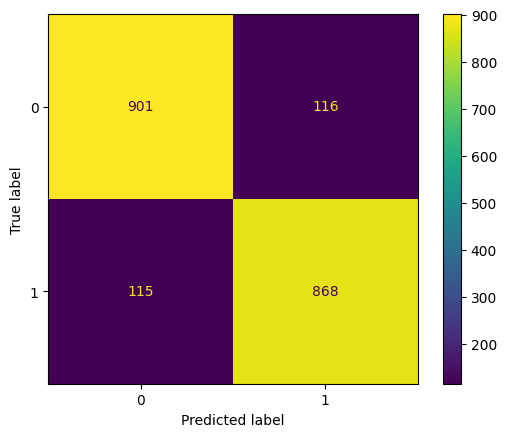

In [137]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [138]:
import matplotlib.pyplot as plt
import numpy as np

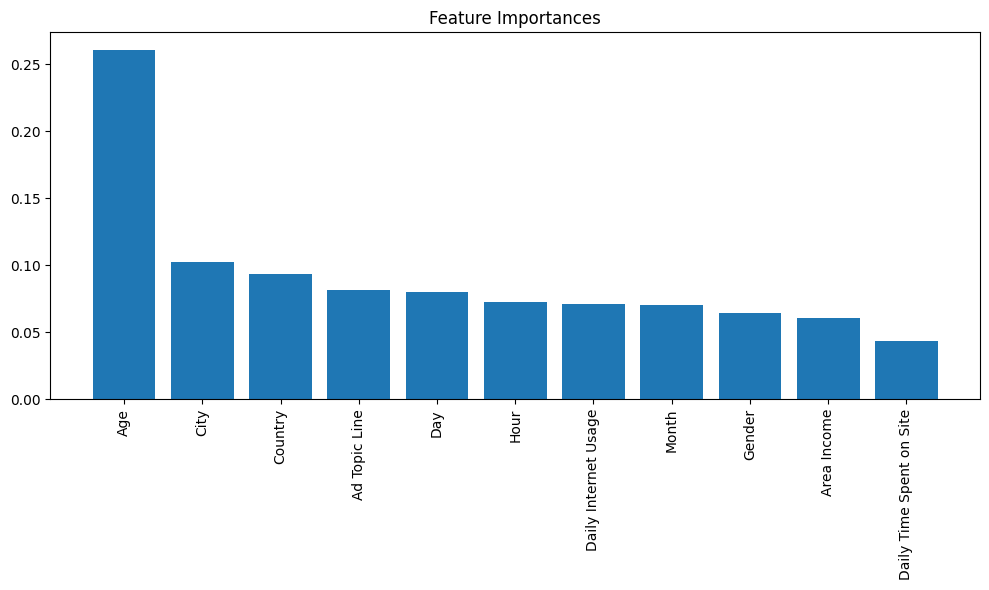

In [139]:
importance = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1017
           1       0.88      0.88      0.88       983

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [141]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8845


In [142]:
import joblib

In [143]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [144]:
loaded_model = joblib.load('xgb_model.pkl')

In [145]:
#Importing dataset from MySQL

In [146]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = 'root'
password = 'Harinee$$96'
host = 'localhost' 
database = 'my_ml_database'

# Create a connection engine to MySQL
engine = create_engine(f'mysql+mysqlconnector://{'root'}:{'Harinee$$96'}@{'localhost'}/{'my_ml_database'}')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('ad_10000records.csv')

# Insert the DataFrame into the MySQL table
df.to_sql('ad_data', con=engine, if_exists='replace', index=False)

print("Data loaded into MySQL successfully!")

Data loaded into MySQL successfully!


In [147]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [148]:
label_encoders = {}
categorical_columns = ['Gender', 'Country', 'Ad Topic Line', 'City']

In [149]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [150]:
df.drop(columns=['Timestamp'], inplace=True)

In [151]:
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [153]:
scaler = StandardScaler()
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'Month']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [154]:
from xgboost import XGBClassifier
from sqlalchemy import create_engine
import pandas as pd

In [155]:
engine = create_engine(f'mysql+mysqlconnector://{'root'}:{'Harinee$$96'}@{'localhost'}/{'my_ml_database'}')
query = "SELECT * FROM ad_data"
df = pd.read_sql(query, con=engine)

In [156]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [157]:
predictions = model.predict(X_test)

In [158]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 87.40%


In [159]:
predictions_df = pd.DataFrame({'predictions': predictions})

# Insert predictions into a new table in MySQL
predictions_df.to_sql('model_predictions', con=engine, if_exists='replace', index=False)

print("Predictions saved to MySQL!")

Predictions saved to MySQL!


In [160]:
predictions_query = "SELECT * FROM model_predictions"
predictions_from_db = pd.read_sql(predictions_query, con=engine)

print(predictions_from_db.head())

   predictions
0            0
1            0
2            0
3            0
4            1
